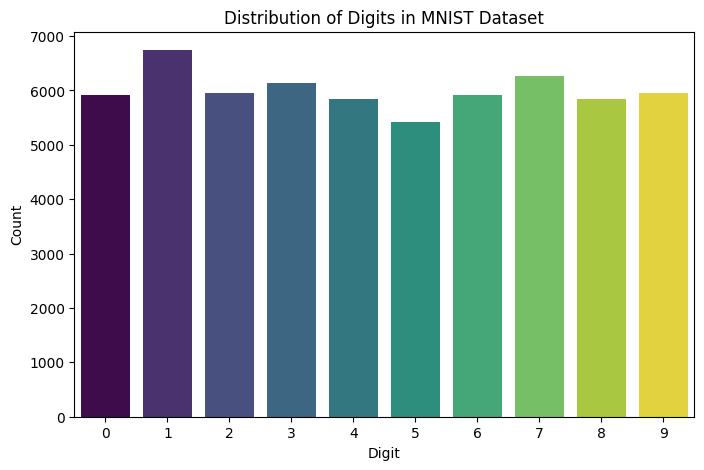

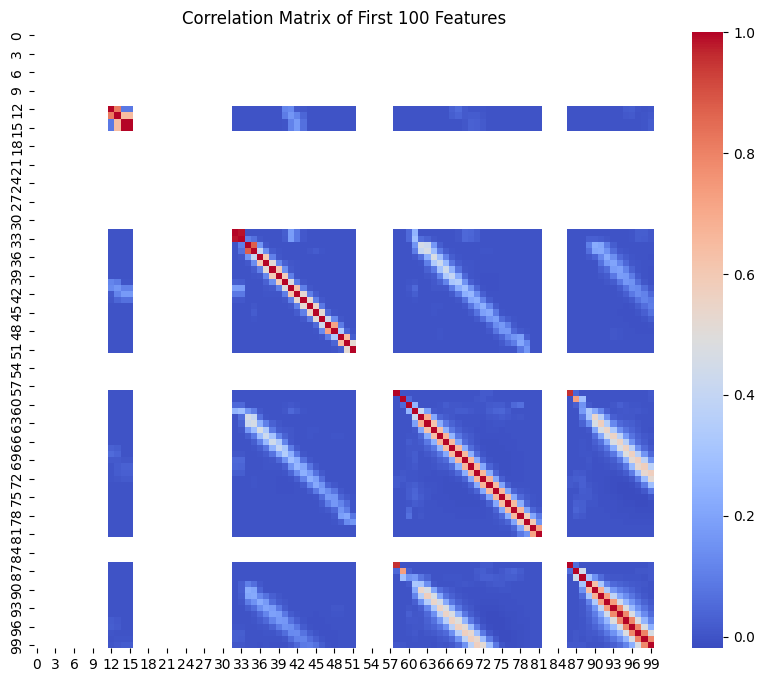


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.94      0.93       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



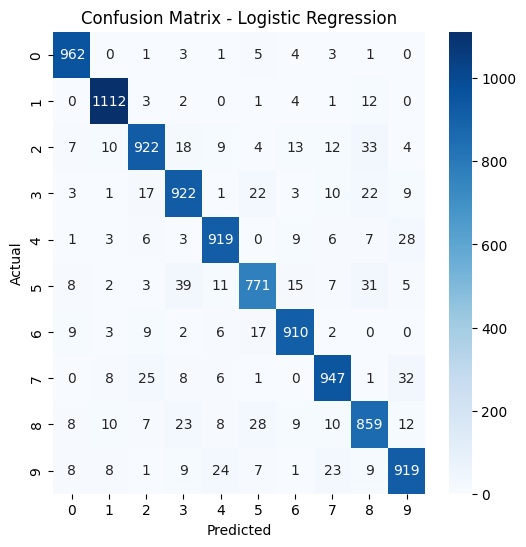


Model: Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       980
           1       0.94      0.97      0.96      1135
           2       0.86      0.86      0.86      1032
           3       0.87      0.86      0.86      1010
           4       0.85      0.86      0.86       982
           5       0.85      0.83      0.84       892
           6       0.89      0.90      0.90       958
           7       0.91      0.90      0.91      1028
           8       0.83      0.80      0.81       974
           9       0.85      0.86      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



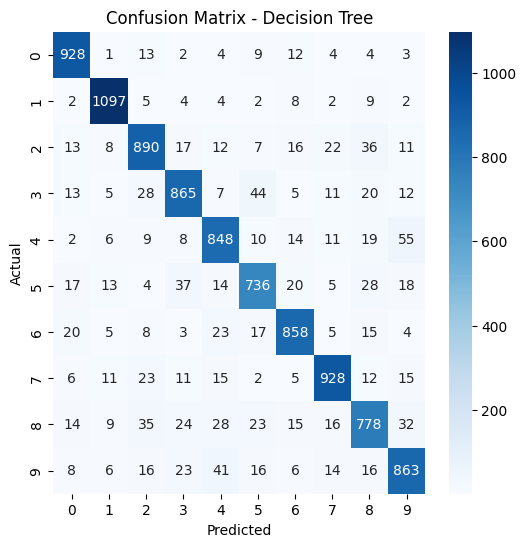


Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



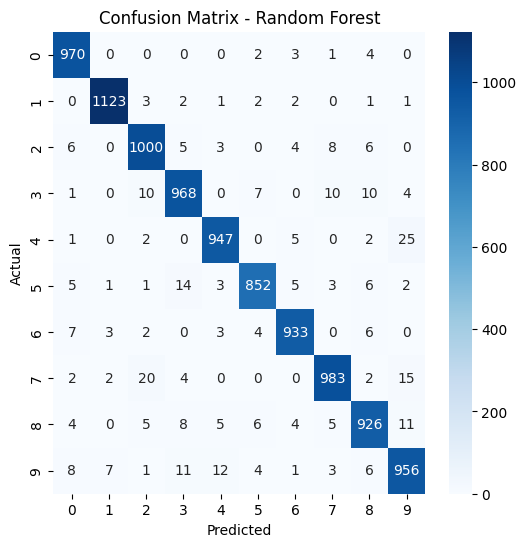


Model Accuracy Comparison:
Logistic Regression: 0.9243
Decision Tree: 0.8791
Random Forest: 0.9658


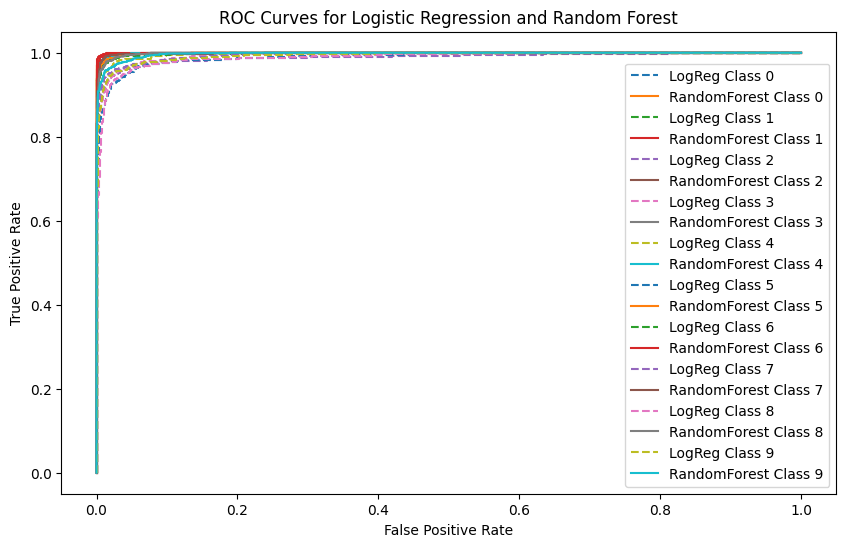

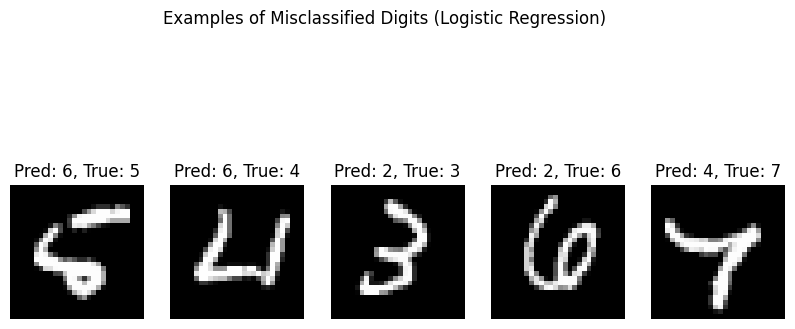

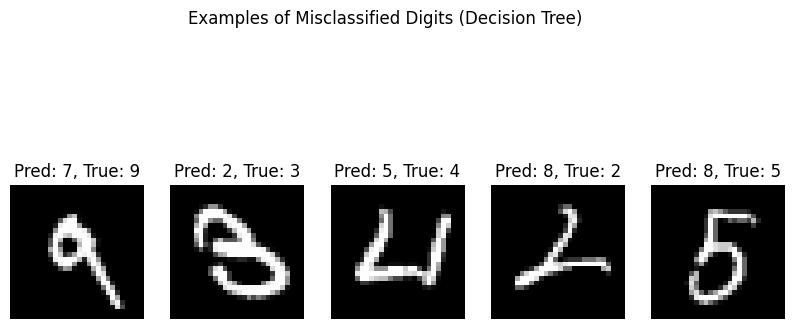

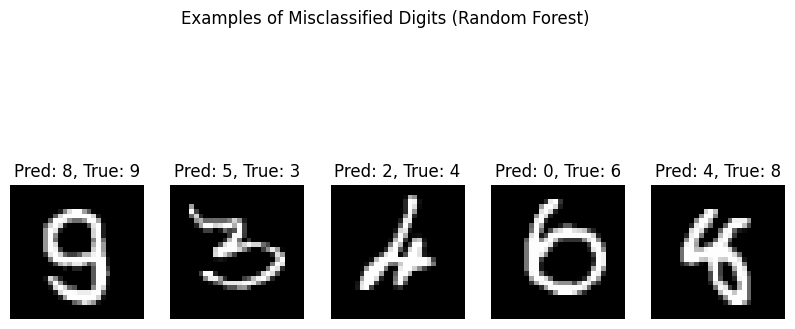

In [3]:
# Google Colab Notebook for MNIST Classification

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten images (convert 28x28 to 1D vector)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize data (scale pixel values to 0-1 range)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,5))
sns.countplot(x=y_train, palette="viridis", hue=y_train, legend=False)
plt.title("Distribution of Digits in MNIST Dataset")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Correlation matrix (first 100 features)
correlation_matrix = pd.DataFrame(X_train[:, :100]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix of First 100 Features")
plt.show()

# Split train data further for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Decision Tree Model
decision_tree = DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Random Forest Model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    print(f'\nModel: {model_name}')
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_forest, "Random Forest")

# Compare Accuracy
accuracy_results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log_reg),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_forest)
}

print("\nModel Accuracy Comparison:")
for model, acc in accuracy_results.items():
    print(f"{model}: {acc:.4f}")

# ROC Curves and AUC Analysis
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8,9])
y_score_log_reg = log_reg.predict_proba(X_test)
y_score_forest = random_forest.predict_proba(X_test)

plt.figure(figsize=(10,6))
for i in range(10):
    fpr_log, tpr_log, _ = roc_curve(y_test_bin[:, i], y_score_log_reg[:, i])
    fpr_forest, tpr_forest, _ = roc_curve(y_test_bin[:, i], y_score_forest[:, i])
    plt.plot(fpr_log, tpr_log, linestyle='--', label=f'LogReg Class {i}')
    plt.plot(fpr_forest, tpr_forest, label=f'RandomForest Class {i}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Logistic Regression and Random Forest")
plt.legend()
plt.show()

# Error Analysis (Misclassified Examples)
def plot_misclassified_images(y_test, y_pred, X_test, model_name):
    misclassified_indices = np.where(y_test != y_pred)[0]
    plt.figure(figsize=(10,5))

    for i, index in enumerate(misclassified_indices[:5]):
        plt.subplot(1, 5, i + 1)
        plt.imshow(X_test[index].reshape(28,28), cmap='gray')
        plt.title(f'Pred: {y_pred[index]}, True: {y_test[index]}')
        plt.axis('off')

    plt.suptitle(f"Examples of Misclassified Digits ({model_name})")
    plt.show()

# Call function for all models
plot_misclassified_images(y_test, y_pred_log_reg, X_test, "Logistic Regression")
plot_misclassified_images(y_test, y_pred_tree, X_test, "Decision Tree")
plot_misclassified_images(y_test, y_pred_forest, X_test, "Random Forest")

